What still needs to be done

Choose the best model (may not be the last one)

Initialize the DATA

In [168]:


from sklearn.model_selection import train_test_split
from sociophysicsDataHandler import SociophysicsDataHandler
import pandas as pd
import matplotlib.pyplot as pl

student_config = True

file_target = 'asdz/platform2.2/20200428/ASDZ_Perron2.2_2020042815_trajectorie.parquet' 

if student_config:
    dh = SociophysicsDataHandler()
    dh.fetch_prorail_data_from_path(file_target)
else:
    webdav_basepath='/Crowdflow (Projectfolder)/ProRail_USE_LL_data'
    dh = SociophysicsDataHandler(basepath=webdav_basepath)
    
    dh.fetch_prorail_data_from_path(file_target)
                           # ,basepath=webdav_basepath)

print('The available files are the following:')
dh.list_files("econophysics/reddit/")
for path in dh.filelist['path']:
    print(path)

targetPosts = True
stock = 'GME'

if targetPosts:
    filename = 'submissions_wallstreetbets_' + stock + '_start20200901_end20210706.json'
    if stock == 'GME':
        filename = 'submissions_wallstreetbets_GME_start20200901_end20210624.json'
else:
    filename = 'comments_' + stock + '.tar.gz'
    
dh.fetch_econophysics_data_from_path("econophysics/reddit/" + filename)
df = dh.df
# print one of the entries (in this case, the fifth):
df

for col in df.columns:
    print(col)

pd.set_option('display.max_columns', None)
df

trying to fetch: /storage/surfsara/ProRail_USE_LL_data/asdz/platform2.2/20200428/ASDZ_Perron2.2_2020042815_trajectorie.parquet
data fetched. Accessible as <this-object>.df
The available files are the following:
targeting path /storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/
Files listed. Accessible as <this-object>.filelist
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_AAPL.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_AMC.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_BBBY.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_FIZZ.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_GME.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_LGND.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_NOKIA.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_VIAC.tar.gz
/storage/surfsara/ProRail_USE_LL_

,id,all_awardings,author,author_fullname,created_utc,full_link,gildings,id.1,link_flair_css_class,link_flair_text,num_comments,num_crossposts,over_18,permalink,pinned,retrieved_on,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,total_awards_received,upvote_ratio,url,created,removed_by_category
0,o72ekv,[],Siphen_,t2_a0s1xfzf,1624546147,https://www.reddit.com/r/wallstreetbets/commen...,{},o72ekv,dd,DD,0,0,False,/r/wallstreetbets/comments/o72ekv/citadel_capi...,False,1624546158,1,If you find where they are hiding taking profi...,wallstreetbets,t5_2th52,10584237,Citadel Capital Replenishment,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1624538947,None
1,o72axq,[],Obvious-Amoeba-7158,t2_5kecmdlv,1624545829,https://www.reddit.com/r/wallstreetbets/commen...,{},o72axq,meme,Meme,1,0,False,/r/wallstreetbets/comments/o72axq/a_bird_took_...,False,1624545840,1,None,wallstreetbets,t5_2th52,10584217,A bird took a shit on my right shoulder. That ...,0,1.0,https://i.redd.it/kz3w2tqa78771.jpg,1624538629,moderator
2,o728za,[],Obvious-Amoeba-7158,t2_5kecmdlv,1624545659,https://www.reddit.com/r/wallstreetbets/commen...,{},o728za,news,News,1,0,False,/r/wallstreetbets/comments/o728za/a_bird_took_...,False,1624545671,1,None,wallstreetbets,t5_2th52,10584198,A bird took a shit on my right shoulder. That ...,0,1.0,https://i.redd.it/8mfoeejs68771.jpg,1624538459,moderator
3,o7284r,[],QuantitativEasing,t2_51vqmztv,1624545587,https://www.reddit.com/r/wallstreetbets/commen...,{},o7284r,yolo,YOLO,0,0,False,/r/wallstreetbets/comments/o7284r/been_with_gm...,False,1624545598,1,None,wallstreetbets,t5_2th52,10584191,Been with GME since $6,0,1.0,https://www.reddit.com/gallery/o7284r,1624538387,None
4,o723cs,[],Shlome_Mendlovits,t2_auf64xr4,1624545165,https://www.reddit.com/r/wallstreetbets/commen...,{},o723cs,dd,DD,0,0,False,/r/wallstreetbets/comments/o723cs/pubm_stock_i...,False,1624545177,1,"$PUBM STOCK IS 55% SHORTED, it is the MOST SHO...",wallstreetbets,t5_2th52,10584165,"$PUBM STOCK IS 55% SHORTED, it is the MOST SHO...",0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1624537965,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175412,ikrq8w,[],DeepFuckingValue,t2_49l8qytq,1598990735,https://www.reddit.com/r/wallstreetbets/commen...,{},ikrq8w,yolo,YOLO,93,0,False,/r/wallstreetbets/comments/ikrq8w/gme_yolo_mon...,False,1598990746,1,None,wallstreetbets,t5_2th52,1452992,GME YOLO month-start update — Sep 1 2020,0,1.0,https://i.redd.it/r47cc12lelk51.png,1598983535,None
175413,ikpgw9,[],airdoon,t2_10emmm,1598983707,https://www.reddit.com/r/wallstreetbets/commen...,{},ikpgw9,question,Discussion,41,0,False,/r/wallstreetbets/comments/ikpgw9/gme_short_sq...,False,1598983717,1,This is for all of you who think GME is the ne...,wallstreetbets,t5_2th52,1452670,GME short squeeze,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598976507,None
175414,ikp9ie,[],cyanlce,t2_zaweod7,1598983100,https://www.reddit.com/r/wallstreetbets/commen...,{},ikp9ie,question,Discussion,0,0,False,/r/wallstreetbets/comments/ikp9ie/gme_short_sq...,False,1598983111,1,[removed],wallstreetbets,t5_2th52,1452638,$GME short squeeze to the moon,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598975900,moderator
175415,ikeagj,[],King_Tendie_69,t2_5wcvwhh8,1598936908,https://www.reddit.com/r/wallstreetbets/commen...,{},ikeagj,question,Discussion,1,0,False,/r/wallstreetbets/comments/ikeagj/gme_who_is_w...,False,1598936918,1,[https://www.marketwatch.com/investing/stock/g...,wallstreetbets,t5_2th52,1451373,GME: Who is wielding adamantium gauntlets?,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598929708,None


In [169]:
#Drop all unimportant columns

df.drop(['all_awardings', 'id','author', 'author_fullname','created', 'full_link',  'gildings', 'id.1', 'link_flair_css_class', 'permalink', 'pinned', 'retrieved_on', 'selftext', 'subreddit', 'subreddit_id', 'subreddit_subscribers', 'title', 'url', 'removed_by_category'], axis='columns', inplace= True)
redditPosts = df.set_index('created_utc')
redditPosts.sort_index(inplace=True)
redditPosts.index = pd.to_datetime(redditPosts.index, origin='unix', unit='s')

#Take the mean of all these values over a day
daily_mean_Posts = redditPosts.resample('D').mean()
daily_mean_Posts



,num_comments,num_crossposts,over_18,score,total_awards_received,upvote_ratio
created_utc,,,,,,
2020-09-01,27.000000,0.0,0.000000,1.000000,0.000000,1.000000
2020-09-02,48.333333,0.0,0.000000,1.000000,0.000000,1.000000
2020-09-03,5.000000,0.0,0.000000,1.000000,0.000000,0.996667
2020-09-04,0.666667,0.0,0.000000,1.000000,0.000000,1.000000
2020-09-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-06-20,24.280000,0.0,0.000000,1.860000,0.060000,0.946400
2021-06-21,1.142857,0.0,0.000000,1.337662,0.025974,0.955974
2021-06-22,0.277778,0.0,0.000000,1.009259,0.000000,0.995278


Get the Daily prices

In [170]:
dh.fetch_econophysics_data_from_path("econophysics/prices/daily_close_prices.csv")
prices = dh.df
prices.index = pd.to_datetime(prices.index) # to be sure that the index is in the pandas DateTime format
prices

trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/prices/daily_close_prices.csv
data fetched. Accessible as <this-object>.df


,BBBY,NOKIA,AMC,VIAC,FIZZ,GME,AAPL,LGND
2020-09-01,13.040,3.9890,6.07,27.057624,39.111922,7.65,133.522244,101.79
2020-09-02,12.435,3.9960,7.04,27.653478,39.591016,7.71,130.755872,103.22
2020-09-03,11.830,3.8075,6.60,27.594869,38.609342,7.82,120.287441,98.73
2020-09-04,11.750,3.7645,7.02,28.083274,38.064490,7.65,120.367049,99.07
2020-09-07,NaN,3.6415,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-07-08,28.450,4.5830,47.94,41.460000,45.400000,191.38,143.240000,127.92
2021-07-09,29.600,4.6545,46.19,42.770000,45.100000,191.23,145.110000,129.40
2021-07-12,30.100,4.6220,42.61,43.440000,44.530000,189.25,144.500000,126.36
2021-07-13,29.350,4.9925,39.35,42.580000,44.380000,180.06,145.640000,121.98


In [171]:
#Combine the dfs, add time as a float column

combined_df_all_stocks = daily_mean_Posts.join(prices)
combined_df_all_stocks = combined_df_all_stocks.reset_index()
combined_df_all_stocks.rename(columns={'index': 'created_utc'}, inplace=True)
combined_df_all_stocks['created_utc'] = combined_df_all_stocks['created_utc'].apply(lambda x: x.timestamp())
combined_df_all_stocks
prices_post_join = combined_df_all_stocks.iloc[:, -8:]
prices_post_join.dropna(inplace=True)
prices_post_join

,BBBY,NOKIA,AMC,VIAC,FIZZ,GME,AAPL,LGND
0,13.040,3.9890,6.07,27.057624,39.111922,7.65,133.522244,101.79
1,12.435,3.9960,7.04,27.653478,39.591016,7.71,130.755872,103.22
2,11.830,3.8075,6.60,27.594869,38.609342,7.82,120.287441,98.73
3,11.750,3.7645,7.02,28.083274,38.064490,7.65,120.367049,99.07
7,11.320,3.5705,6.42,28.044202,35.654929,7.70,112.266952,99.10
...,...,...,...,...,...,...,...,...
290,27.380,4.3470,59.26,40.030000,45.760000,213.82,130.460000,126.61
293,27.680,4.3330,55.69,40.960000,46.490000,200.37,132.300000,128.98
294,28.660,4.3340,58.27,40.750000,46.360000,220.40,133.980000,129.61
295,29.310,4.2900,58.30,41.840000,46.530000,219.34,133.700000,128.19


ACTUAL MACHINE LEARNING STUFF

In [172]:
#Specify which stock we gon use and add the time back as a column

stock = 'GME'
combined_df = daily_mean_Posts.join(prices[stock]).reset_index()
combined_df.rename(columns={'index': 'created_utc'}, inplace=True)
combined_df.insert(combined_df.shape[1]-1, 'GME', combined_df.pop('GME'))
#Convert time to float
combined_df['created_utc'] = combined_df['created_utc'].apply(lambda x: x.timestamp())




stocktest = 'BBBY'
combined_dftest = daily_mean_Posts.join(prices[stocktest]).reset_index()
combined_dftest.rename(columns={'index': 'created_utc'}, inplace=True)
combined_dftest.insert(combined_dftest.shape[1]-1, stocktest, combined_dftest.pop(stocktest))
#Convert time to float
combined_dftest['created_utc'] = combined_dftest['created_utc'].apply(lambda x: x.timestamp())





Not my code

In [173]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model 
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

	

# transform the time series data into supervised learning
data = series_to_supervised(combined_df, n_in=1)
# evaluate
mae, y, yhat = walk_forward_validation(data, 140)
print('MAE: %.3f' % mae)


>expected=9.5, predicted=9.2
>expected=10.6, predicted=9.5
>expected=10.0, predicted=10.6
>expected=9.1, predicted=10.0
>expected=10.0, predicted=9.7
>expected=10.3, predicted=9.2
>expected=10.2, predicted=10.3
>expected=9.8, predicted=10.2
>expected=9.4, predicted=9.9
>expected=9.1, predicted=9.4
>expected=9.4, predicted=8.7
>expected=13.5, predicted=9.3
>expected=12.0, predicted=13.5
>expected=11.9, predicted=12.0
>expected=12.2, predicted=11.9
>expected=13.8, predicted=12.2
>expected=13.3, predicted=13.8
>expected=13.9, predicted=13.4
>expected=14.1, predicted=13.9
>expected=14.9, predicted=14.1
>expected=15.0, predicted=13.3
>expected=12.7, predicted=15.0
>expected=11.8, predicted=12.8
>expected=11.7, predicted=11.8
>expected=10.5, predicted=12.2
>expected=11.6, predicted=10.5
>expected=10.9, predicted=11.6
>expected=11.1, predicted=10.7
>expected=11.8, predicted=10.7
>expected=11.1, predicted=11.7
>expected=11.0, predicted=11.7
>expected=11.6, predicted=11.1
>expected=11.6, predic

In [174]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.598918e+09,27.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7.65,1.599005e+09,48.333333,0.000000,0.000000,1.000000,0.000000,1.000000,7.71
1,1.599005e+09,48.333333,0.000000,0.000000,1.000000,0.000000,1.000000,7.71,1.599091e+09,5.000000,0.000000,0.000000,1.000000,0.000000,0.996667,7.82
2,1.599091e+09,5.000000,0.000000,0.000000,1.000000,0.000000,0.996667,7.82,1.599178e+09,0.666667,0.000000,0.000000,1.000000,0.000000,1.000000,7.65
3,1.599523e+09,7.000000,0.000000,0.000000,1.000000,0.000000,0.998750,7.70,1.599610e+09,34.125000,0.000000,0.000000,1.000000,0.000000,1.000000,7.35
4,1.599610e+09,34.125000,0.000000,0.000000,1.000000,0.000000,1.000000,7.35,1.599696e+09,11.500000,0.000000,0.000000,1.000000,0.000000,1.000000,6.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1.623802e+09,38.394737,0.078947,0.000000,34.907895,0.881579,0.905658,222.97,1.623888e+09,10.662162,0.013514,0.013514,9.554054,0.108108,0.922432,223.59
144,1.623888e+09,10.662162,0.013514,0.013514,9.554054,0.108108,0.922432,223.59,1.623974e+09,35.596491,0.000000,0.000000,14.105263,0.456140,0.914211,213.82
145,1.624234e+09,1.142857,0.000000,0.000000,1.337662,0.025974,0.955974,200.37,1.624320e+09,0.277778,0.000000,0.000000,1.009259,0.000000,0.995278,220.40
146,1.624320e+09,0.277778,0.000000,0.000000,1.009259,0.000000,0.995278,220.40,1.624406e+09,0.271845,0.000000,0.009709,1.009709,0.000000,0.999903,219.34


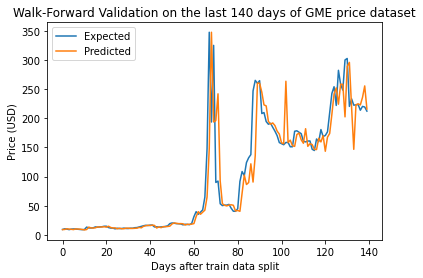

In [175]:
# plot expected vs preducted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.title('Walk-Forward Validation on the last 140 days of GME price dataset')
plt.xlabel('Days after train data split')
plt.ylabel('Price (USD)')
plt.show()

Using this fit on new stocks

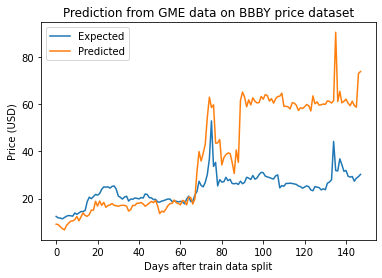

In [176]:
#Test on new data

data = series_to_supervised(combined_dftest, n_in=1)
data = asarray(data)
# split into input and output columns
testX, testy = data[:, :-1], data[:, -1]
newpredy = model.predict(testX)

# plot expected vs preducted
plt.plot(testy, label='Expected')
plt.plot(newpredy, label='Predicted')
plt.legend()
plt.title('Prediction from GME data on BBBY price dataset')
plt.xlabel('Days after train data split')
plt.ylabel('Price (USD)')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

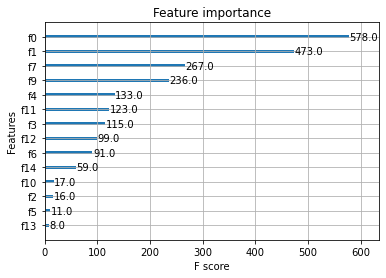

In [177]:
import xgboost as xgb

xgb.plot_importance(model)

In [178]:
#Create dataframes for each stock

#uses the combined
dfpredictions = DataFrame()
for column_name in prices:
    combined_df = daily_mean_Posts.join(prices[column_name]).reset_index()
    combined_df.rename(columns={'index': 'created_utc'}, inplace=True)
    combined_df.insert(combined_df.shape[1]-1, column_name, combined_df.pop(column_name))
#Convert time to float
    combined_df['created_utc'] = combined_df['created_utc'].apply(lambda x: x.timestamp())
    data = series_to_supervised(combined_dftest, n_in=1)
    data = asarray(data)
# split into input and output columns
    testX, testy = data[:, :-1], data[:, -1]
    newpredy = model.predict(testX)
    new_column_name = f'{column_name}_Prediction'
    dfpredictions[new_column_name] = newpredy

#dfpredictions = dfpredictions.set_index(prices.index)


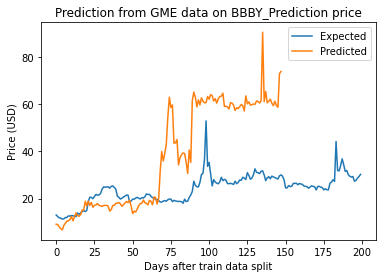

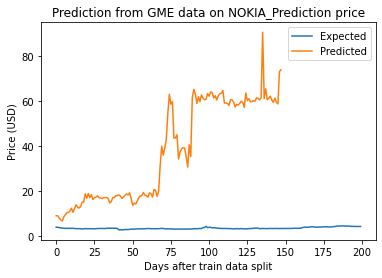

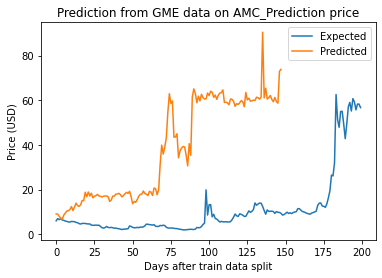

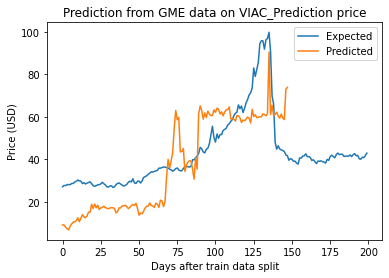

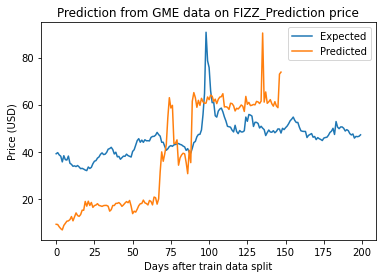

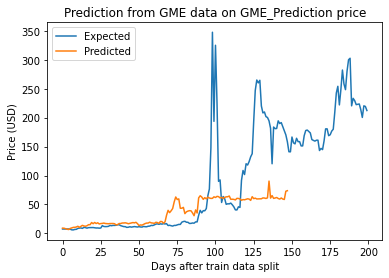

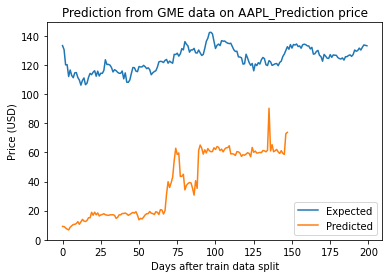

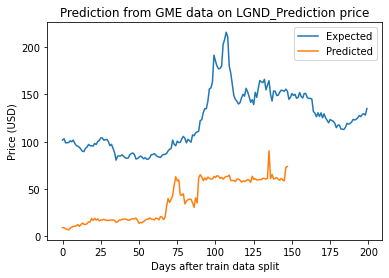

IndexError: single positional indexer is out-of-bounds

In [182]:
# plot expected vs preducted
nodateprices = prices_post_join.reset_index(drop = True)
for i in range(9):
    plt.plot(nodateprices.iloc[:,i], label='Expected')
    plt.plot(dfpredictions.iloc[:,i], label='Predicted')
    plt.legend()
    plt.title(f"Prediction from GME data on {dfpredictions.columns[i]} price")
    plt.xlabel('Days after train data split')
    plt.ylabel('Price (USD)')
    plt.show()

Column name for column 1: A
